In [23]:
import torch
import matplotlib.pyplot as plt
A=8
W=1
qat_acc = []
qavat_acc = []
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    basemodel = 'saved/testResult_noise%.4f_ResNet18_A%sW%s_noise0.0.ckpt'%(noise,A,W)
    VAmodel = 'saved/testResult_noise%.4f_ResNet18_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
    basemodel_res = torch.load(basemodel)
    VAmodel_res = torch.load(VAmodel)
    print("noise %s"%noise)
    print("QAT %.4f"%(basemodel_res['mean_acc']))
    print("QAT+VAT %.4f"%(VAmodel_res['mean_acc']))
    print("")
    qat_acc.append(basemodel_res['mean_acc'])
    qavat_acc.append(VAmodel_res['mean_acc'])

noise 0.1
QAT 0.6802
QAT+VAT 0.6784

noise 0.2
QAT 0.6649
QAT+VAT 0.6672

noise 0.3
QAT 0.6378
QAT+VAT 0.6481

noise 0.4
QAT 0.5958
QAT+VAT 0.6232

noise 0.5
QAT 0.5346
QAT+VAT 0.6008



In [24]:
qat_acc[0]

0.6802288999999999

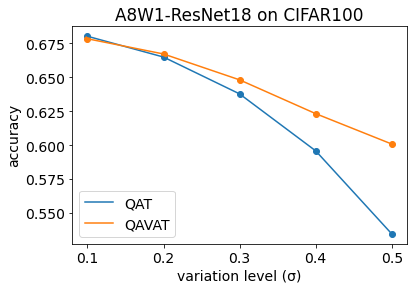

In [25]:
#plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})
plt.plot(noise_list,qat_acc,label='QAT')
plt.scatter(noise_list,qat_acc)
plt.plot(noise_list,qavat_acc,label='QAVAT')
plt.scatter(noise_list,qavat_acc)
plt.title('A%sW%s-ResNet18 on CIFAR100'%(A,W))
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('A%sW%s-ResNet18.pdf'%(A,W))
plt.show()

noise 0.1
A8W1 0.6802

noise 0.1
A8W4 0.6955

noise 0.2
A8W1 0.6649

noise 0.2
A8W4 0.6768

noise 0.3
A8W1 0.6378

noise 0.3
A8W4 0.6421

noise 0.4
A8W1 0.5958

noise 0.4
A8W4 0.5890

noise 0.5
A8W1 0.5346

noise 0.5
A8W4 0.5105



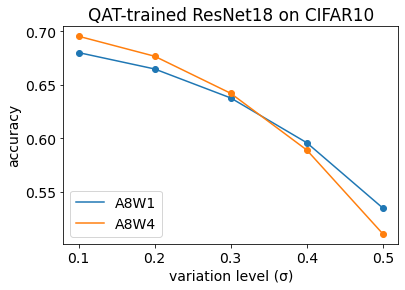

In [22]:
A_list=[8]
W_list=[1,4]
A_Ws = [(a,w) for a in A_list for w in W_list]
acc_listOflist=[[] for _ in A_Ws]
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    for i in range(len(A_Ws)):
        A,W = A_Ws[i]
        model = 'saved/testResult_noise%.4f_ResNet18_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
        model = 'saved/testResult_noise%.4f_ResNet18_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        model_res = torch.load(model)
        print("noise %s"%noise)
        print("A%sW%s %.4f"%(A,W,model_res['mean_acc']))
        print("")
        acc_listOflist[i].append(model_res['mean_acc'])
#plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})        
for i in range(len(A_Ws)):
    A,W = A_Ws[i]
    plt.plot(noise_list,acc_listOflist[i],label='A%sW%s'%(A,W))
    plt.scatter(noise_list,acc_listOflist[i])
plt.title('QAT-trained ResNet18 on CIFAR10')
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('QAT_robust_trend.pdf')
plt.show()

    

noise 0.1
A8W1 0.6784

noise 0.1
A8W4 0.6928

noise 0.2
A8W1 0.6672

noise 0.2
A8W4 0.6832

noise 0.3
A8W1 0.6481

noise 0.3
A8W4 0.6638

noise 0.4
A8W1 0.6232

noise 0.4
A8W4 0.6466

noise 0.5
A8W1 0.6008

noise 0.5
A8W4 0.6111



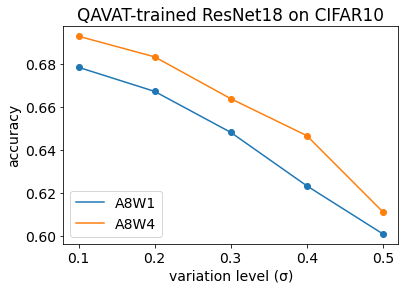

In [27]:
A_list=[8]
W_list=[1,4]
A_Ws = [(a,w) for a in A_list for w in W_list]
acc_listOflist=[[] for _ in A_Ws]
noise_list = (0.1,0.2,0.3,0.4,0.5)
for noise in noise_list:
    for i in range(len(A_Ws)):
        A,W = A_Ws[i]
        model = 'saved/testResult_noise%.4f_ResNet18_A%sW%s_noise%s.ckpt'%(noise,A,W,noise)
        #model = 'saved/testResult_noise%.4f_VGG_A%sW%s_noise0.0.ckpt'%(noise,A,W)
        model_res = torch.load(model)
        print("noise %s"%noise)
        print("A%sW%s %.4f"%(A,W,model_res['mean_acc']))
        print("")
        acc_listOflist[i].append(model_res['mean_acc'])
#plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})        
for i in range(len(A_Ws)):
    A,W = A_Ws[i]
    plt.plot(noise_list,acc_listOflist[i],label='A%sW%s'%(A,W))
    plt.scatter(noise_list,acc_listOflist[i])
plt.title('QAVAT-trained ResNet18 on CIFAR10')
plt.xlabel('variation level (\u03C3)')
plt.ylabel('accuracy')
plt.legend(loc='lower left')
plt.savefig('QAT_robust_trend.pdf')
plt.show()